In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# header 無しで Excel を読み込む
excel_df = pd.read_excel('test_result.xls', sheetname='Result', header=None)

# D列以降のデータのみを使用
df = excel_df.copy()
df = df.ix[:, 3:]

# index と column を反転
df = df.T

# column名を書き換え
columns = {
    0: 'Date',
    3: 'Nation',
    4: 'Sex',
    7: 'Experience',
    61: 'Total Score',
    64: 'Total Error',
    118: 'Early Game Score',
    119: 'Middle Game Score',
    120: 'End Game Score',
    121: 'Other Score',
    132: 'Early Game Error',
    133: 'Middle Game Error',
    134: 'End Game Error',
    135: 'Other Error',
}
df.rename(columns=columns, inplace=True)
# column の絞り込み
df = df[columns.values()]

# Date列が NaN のデータは除外
df = df.dropna(subset=['Date'])

def get_deviation(s):
    """
    s: Series
    """
    return (s - s.mean()) / s.std(ddof=False) * 10 + 50

# 偏差値列を追加
df['Deviation of Total Score'] = get_deviation(df['Total Score'])
df['Deviation of Early Game Score'] = get_deviation(df['Early Game Score'])
df['Deviation of Middle Game Score'] = get_deviation(df['Middle Game Score'])
df['Deviation of End Game Score'] = get_deviation(df['End Game Score'])
df['Deviation of Other Score'] = get_deviation(df['Other Score'])
df['Deviation of Total Error'] = 100 - get_deviation(df['Total Error'])
df['Deviation of Early Game Error'] = 100 - get_deviation(df['Early Game Error'])
df['Deviation of Middle Game Error'] = 100 - get_deviation(df['Middle Game Error'])
df['Deviation of End Game Error'] = 100 - get_deviation(df['End Game Error'])
df['Deviation of Other Error'] = 100 - get_deviation(df['Other Error'])

# Total Score列の降順、Total Error列の昇順でソート
df = df.sort_values(by=['Total Score', 'Total Error'], ascending=[False, True])

In [2]:
# 各代表値を求める
sliced = df[['Total Score', 'Early Game Score', 'Middle Game Score', 'End Game Score', 'Other Score', 'Total Error', 'Early Game Error', 'Middle Game Error', 'End Game Error', 'Other Error']]
desc = pd.DataFrame(
    [sliced.max(), sliced.min(), sliced.mean(), sliced.median(), sliced.var(ddof=False), sliced.std(ddof=False)],
    index=['max', 'min', 'mean', 'median', 'var', 'std']
)
desc

,Total Score,Early Game Score,Middle Game Score,End Game Score,Other Score,Total Error,Early Game Error,Middle Game Error,End Game Error,Other Error
max,42.000000,9.000000,18.000000,14.000000,4.000000,8413.000000,1036.000000,2904.000000,4353.000000,558.000000
min,6.000000,0.000000,3.000000,0.000000,0.000000,1038.000000,0.000000,248.000000,316.000000,0.000000
mean,21.214660,3.570681,8.617801,6.963351,2.062827,3740.722513,463.806283,1552.010471,1515.434555,209.471204
median,20.000000,3.000000,8.000000,6.000000,2.000000,3729.000000,475.000000,1510.000000,1488.000000,198.000000
var,43.969628,3.313067,7.283243,8.590280,1.053644,1574673.970121,42245.622159,308382.973712,439734.570324,20692.249171
std,6.630960,1.820183,2.698748,2.930918,1.026472,1254.860140,205.537398,555.322405,663.124853,143.848007


In [3]:
# その他の統計量
df.describe()

,Date,Total Error,Nation,Early Game Error,Middle Game Error,End Game Error,Experience,Sex,Other Error,Early Game Score,...,Deviation of Total Score,Deviation of Early Game Score,Deviation of Middle Game Score,Deviation of End Game Score,Deviation of Other Score,Deviation of Total Error,Deviation of Early Game Error,Deviation of Middle Game Error,Deviation of End Game Error,Deviation of Other Error
count,193,191,190,191,191,191,188,191,191,191,...,191.000000,191.000000,191.000000,191.000000,191.00000,191.000000,191.000000,191.000000,191.000000,191.000000
unique,16,187,29,173,183,185,7,2,30,10,...,30.000000,10.000000,15.000000,15.000000,5.00000,187.000000,163.000000,183.000000,184.000000,30.000000
top,2014-05-25 00:00:00,3838,USA,562,1655,1328,over 10 years,Male,55,2,...,43.643967,41.370756,47.710787,46.713143,49.38793,39.829325,49.455393,62.065252,51.137562,60.738502
freq,28,2,51,3,2,2,107,171,31,46,...,15.000000,46.000000,29.000000,35.000000,64.00000,2.000000,3.000000,2.000000,2.000000,31.000000


In [4]:
# 前処理ここまで

# 経験年数ごとにグループ化
grouped = df.groupby('Experience')
# 出力用のデータフレームを作成
experience_df = pd.DataFrame()
experience_df['Size'] = grouped.size()
experience_df['Total Score'] = grouped['Total Score'].apply(np.mean)
experience_df['Early Game Score'] = grouped['Early Game Score'].apply(np.mean)
experience_df['Middle Game Score'] = grouped['Middle Game Score'].apply(np.mean)
experience_df['End Game Score'] = grouped['End Game Score'].apply(np.mean)
experience_df['Other Score'] = grouped['Other Score'].apply(np.mean)
experience_df['Total Error'] = grouped['Total Error'].apply(np.mean)
experience_df['Early Game Error'] = grouped['Early Game Error'].apply(np.mean)
experience_df['Middle Game Error'] = grouped['Middle Game Error'].apply(np.mean)
experience_df['End Game Error'] = grouped['End Game Error'].apply(np.mean)
experience_df['Other Error'] = grouped['Other Error'].apply(np.mean)

# indexの並び替え
experience_df = experience_df.reindex(['under 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years', '5-10 years', 'over 10 years'])
experience_df

,Size,Total Score,Early Game Score,Middle Game Score,End Game Score,Other Score,Total Error,Early Game Error,Middle Game Error,End Game Error,Other Error
Experience,,,,,,,,,,,
under 1 year,7,16.857143,2.857143,7.000000,5.000000,2.000000,4247.000000,523.000000,1800.142857,1677.714286,246.142857
1-2 years,16,18.312500,3.187500,7.812500,5.500000,1.812500,4428.875000,539.375000,1727.250000,1889.687500,272.562500
2-3 years,10,17.700000,2.800000,7.500000,5.300000,2.100000,4755.700000,575.300000,2033.500000,1912.700000,234.200000
3-4 years,8,17.750000,2.875000,7.625000,5.375000,1.875000,4405.750000,494.375000,1789.000000,1894.750000,227.625000
4-5 years,18,19.166667,3.444444,7.388889,6.611111,1.722222,4324.111111,500.777778,1852.111111,1715.111111,256.111111
5-10 years,22,23.476190,3.619048,9.333333,8.047619,2.476190,3305.904762,484.380952,1384.380952,1257.952381,179.190476
over 10 years,107,22.066038,3.783019,8.915094,7.283019,2.084906,3503.160377,427.952830,1456.990566,1422.264151,195.952830


[]

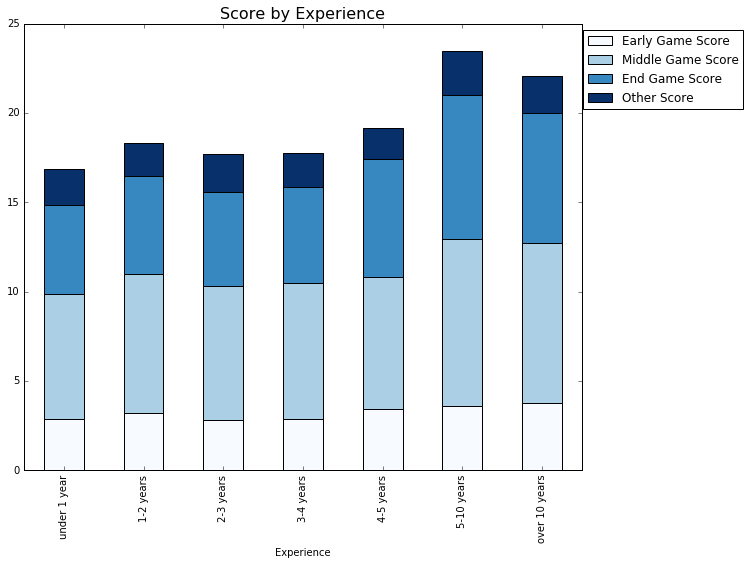

In [5]:
# スコアのグラフ描画
experience_df.plot.bar(
    y=['Early Game Score', 'Middle Game Score', 'End Game Score', 'Other Score'],
    figsize=(10, 8),
    stacked=True,
    cmap='Blues')
plt.title(u'Score by Experience', size=16)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.plot()

[]

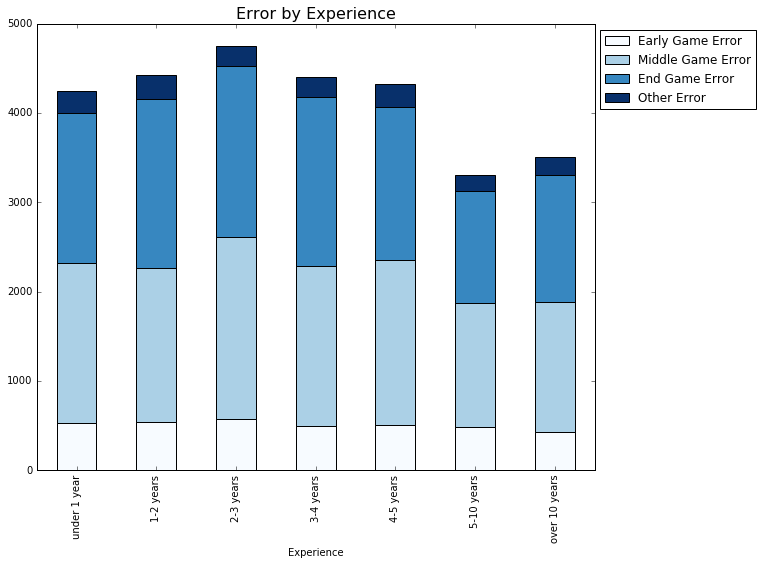

In [6]:
# エラーのグラフ描画
experience_df.plot.bar(
    y=['Early Game Error', 'Middle Game Error', 'End Game Error', 'Other Error'],
    figsize=(10, 8),
    stacked=True,
    cmap='Blues')
plt.title(u'Error by Experience', size=16)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.plot()